# I - Description du problème

Dans ce notebook, on voudrait étudier les différents attributs qui sont dans la table "playerAttributes" et leur relation avec la victoire de l'équipe à laquelle le joueur appratient. Pour cela je vais étudier plusieurs correlations entre plusieurs attributs des joueurs, et le nombre de victoire que leurs équipes ont pu avoir au fil du temps.
Cette analyse va me servir afin de choisir lesquels des attributs représenter dans mon vecteur d'équipe pour la phase de prédiction des résultats des match

# II - Préparation des Donnees

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
match = pd.DataFrame(data=pd.read_csv("../donnees_soccer/match.csv", sep=","))
teamattributes = pd.DataFrame(data=pd.read_csv("../donnees_soccer/teamattributes.csv", sep=","))
playerattributes = pd.DataFrame(data=pd.read_csv("../donnees_soccer/playerattributes.csv", sep=","))
player = pd.DataFrame(data=pd.read_csv("../donnees_soccer/player.csv", sep=","))
team = pd.DataFrame(data=pd.read_csv("../donnees_soccer/team.csv", sep=","))

# Préparation des Donnees

In [3]:
players_team_home = ['home_player_1', "home_player_2", "home_player_3", "home_player_4", "home_player_5",
               "home_player_6", "home_player_7", "home_player_8", "home_player_9", "home_player_10",
               "home_player_11"]

players_team_away = ["away_player_1", "away_player_2", "away_player_3", "away_player_4",
               "away_player_5", "away_player_6", "away_player_7", "away_player_8", "away_player_9",
               "away_player_10", "away_player_11"]

In [4]:
#Liste des équipes
teams_id = np.unique(team[["team_api_id"]])

In [5]:
#Liste des matchs
match_id = np.unique(match[["match_api_id"]])


# III - Code

In [6]:
team_wins = dict()
nb_match= dict()
nb_buts=dict()
for ide in teams_id:
    team_wins[ide] = 0    
    nb_match[ide]=0
    nb_buts[ide]=0

### on calcule un score par equipe

In [7]:
for idm in match_id:
    
    un_match = match[match["match_api_id"]==idm]    
    
    home_team_id = (un_match["home_team_api_id"].values)[0]
    away_team_id = (un_match["away_team_api_id"].values)[0]    
    
    home_goal = (un_match["home_team_goal"].values)[0]
    away_goal = (un_match["away_team_goal"].values)[0]

    nb_match[home_team_id]+=1
    nb_match[away_team_id]+=1
    
    if(home_goal > away_goal):
        team_wins[home_team_id] += 1
    elif(away_goal > home_goal):
        team_wins[away_team_id] += 1
#Normalisation des donnees        
for k in team_wins.keys():
    team_wins[k] = team_wins[k]/nb_match[k]

## Relation team_attributes et player attribute

In [8]:
#calcul d'un score pour un match par un attribut
def get_attributs_fifa(matches, attribute):
    result=dict()
    for ide in teams_id:
        result[ide]=[]
        result[ide].append(50)#on l'inistilise à la moyenne pour avoir une valeur dans tout les cas 
    for idm in matches:
        un_match = match[match["match_api_id"]==idm]
        home_team_id = (un_match["home_team_api_id"].values)[0]
        away_team_id = (un_match["away_team_api_id"].values)[0] 
        un_match = un_match.dropna(axis=1)
        #on recupére la date du match 
        date = un_match['date']    
        tableau_home = []
        tableau_away = []
        for pl in players_team_home:
            
            if pl not in un_match.columns:
                continue
            idpl = (un_match[pl].values)[0]
            player=playerattributes[playerattributes.player_api_id==idpl]
            tableau_home.append((player.sort_values(by = 'date', ascending = False)[:1][attribute].values)[0])
        result[home_team_id].append(np.nanmean(tableau_home))

        for pl in players_team_away:
        
            if pl not in un_match.columns:
                continue
            
            idpl = (un_match[pl].values)[0]
            player=playerattributes[playerattributes["player_api_id"]==idpl]
            tableau_away.append((player.sort_values(by = 'date', ascending = False)[:1][attribute].values)[0])
        
        result[home_team_id].append(np.nanmean(tableau_away))
    for k in result.keys():
        result[k] = np.nanmean(result[k])/100
    return result

# IV - Protocole Expérimental

La représentation des victoires de l'équipe sera fait en calculant le nombre des matchs où il était gagnant au fil du temps (ce qu'on a fait dans le dictionnaire "team_wins")

### A - Relation entre Agressivité et Victoire

In [9]:
agressivity=get_attributs_fifa(match_id,"aggression")

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


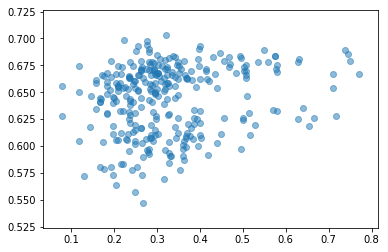

0.19292313476487635

In [10]:
x_victoire = []
y_agressivity = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_agressivity.append(agressivity[k])
    
plt.scatter(x_victoire, y_agressivity, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_agressivity)[1,0]


### B - Relation entre Agilité et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


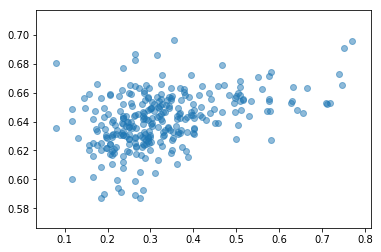

0.43176315932152465

In [11]:
agility=get_attributs_fifa(match_id,"agility")
x_victoire = []
y_agility = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_agility.append(agility[k])
    
plt.scatter(x_victoire, y_agility, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_agility)[1,0]


### C - Relation entre ball_control et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


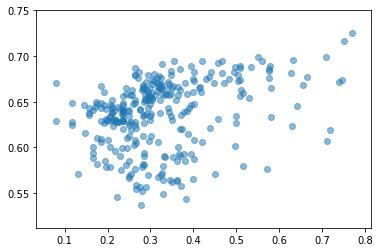

0.32255481627238003

In [12]:
ball_control=get_attributs_fifa(match_id,"ball_control")
x_victoire = []
y_ball_control = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_ball_control.append(ball_control[k])
    
plt.scatter(x_victoire, y_ball_control, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_ball_control)[1,0]


### D - Relation entre Curve et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


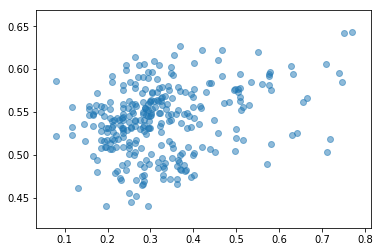

0.29139413516087731

In [13]:
curve=get_attributs_fifa(match_id,"curve")
x_victoire = []
y_curve = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_curve.append(curve[k])
    
plt.scatter(x_victoire, y_curve, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_curve)[1,0]


### E - Relation entre Strength et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


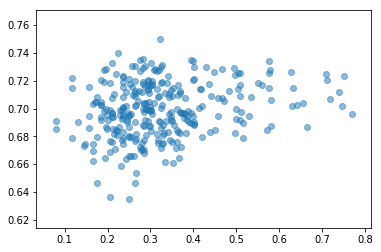

0.22971689824455677

In [14]:
strength=get_attributs_fifa(match_id,"strength")
x_victoire = []
y_strength = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_strength.append(strength[k])
    
plt.scatter(x_victoire, y_strength, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_strength)[1,0]


### F - Relation entre Stamina et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


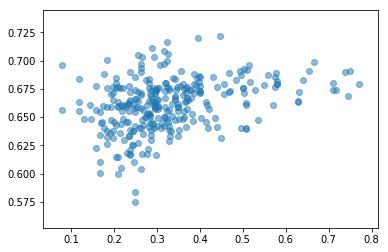

0.3497667026714037

In [15]:
stamina=get_attributs_fifa(match_id,"stamina")
x_victoire = []
y_stamina = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_stamina.append(stamina[k])
    
plt.scatter(x_victoire, y_stamina, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_stamina)[1,0]


### G - Relation entre Potentiel et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


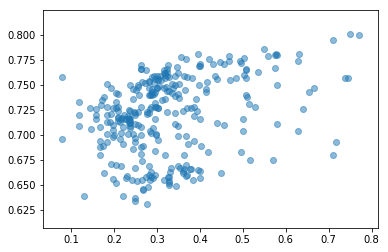

0.32804361380912139

In [16]:
potential=get_attributs_fifa(match_id,"potential")
x_victoire = []
y_potential = []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_potential.append(potential[k])
    
plt.scatter(x_victoire, y_potential, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_potential)[1,0]


### H - Relation entre Overall Rating et Victoire

/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/arij/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


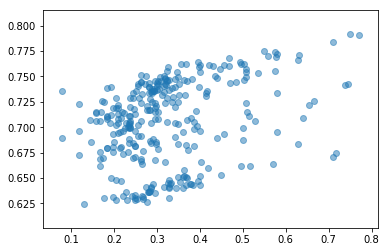

0.32282323372222166

In [17]:
overall_rating=get_attributs_fifa(match_id,"overall_rating")
x_victoire = []
y_overall_rating= []
for k in team_wins.keys():
    x_victoire.append(team_wins[k])
    y_overall_rating.append(overall_rating[k])
    
plt.scatter(x_victoire, y_overall_rating, alpha=0.5)
plt.show()
np.corrcoef(x_victoire, y_overall_rating)[1,0]


# V - CONCLUSION:

A partir de toutes les relations étudiées, et en pensant logiquement aux différents attributs étudiés, on a décidé de garder 5 de ces attributs pour représenter une équipe lors d'un match, afin de faire le machine mearning plus tard: <br>
Stamina <br>
Ball Control <br>
Overall Rating <br>
Agilité <br>
Potentiel